In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

sns.set_theme()
sns.set_context("paper")

In [3]:
# Extraction function
def tensorboard_logs_to_pandas_dataframe(experiment_log_path, ignored_runs=[]):
    """
    This functions assumes that the runs were consecutive continuations. That is,
    version_0 ran for 90 epochs then version_1 from 91 to 180 and so on.
    
    experiment_log_path: Path to the folder containing various runs.
    ignored_runs: Ignored versions.
    """
    pandas_df = pd.DataFrame({"metric": [], "value": [], "step": [], "version_tag": []})
    
    # find out how many run / folders are there
    experiment_runs_folder = {f.name : f.path for f in os.scandir(experiment_log_path) if f.is_dir()}
    
    for experiment_tag, experiment_folder in experiment_runs_folder.items():
        
        if experiment_tag in ignored_runs:
            continue
        
        try:
            event_acc = EventAccumulator(experiment_folder)
            event_acc.Reload()
            tags = event_acc.Tags()["scalars"]
            
            for tag in tags:
                event_list = event_acc.Scalars(tag)
                values = list(map(lambda x: x.value, event_list))
                step = list(map(lambda x: x.step, event_list))
                r = {
                        "metric": [tag] * len(step), 
                        "value": values, 
                        "step": step, 
                        "version_tag": experiment_tag
                }
                r = pd.DataFrame(r)
                pandas_df = pd.concat([pandas_df, r], ignore_index=True)
        
        except Exception:
            print("Event file possibly corrupt: {}".format(experiment_folder))
            
    return pandas_df


In [21]:
tf_metrics_in_path = r"D:\Saarbrucken\EDA_Research\vae-disentanglement\notebooks\dsprites_latentnn_w_kld1\dsprites_latentnn_w_kld1"
csv_metrics_out_path = "./dsprites_metrics_wkld1.csv"

metrics_df_wkld1 = tensorboard_logs_to_pandas_dataframe(tf_metrics_in_path, ignored_runs=["version_0", "version_1"])
metrics_df_wkld1.to_csv(csv_metrics_out_path)

In [41]:
def plot_kld_loss_trends(tensorboard_df, save_path):
    
    kld_loss_trends = tensorboard_df[tensorboard_df["metric"].str.contains("KLD_Per_Node")].reindex()

    kld_trends_plot = sns.lineplot(x="step", y="value", hue="metric", data=kld_loss_trends)

    plt.xlabel('Train epochs')
    plt.ylabel('Average KLD Loss')
    plt.title(r'KLD Loss trends for $\beta = 1$ on $\mathit{DSprites}$ dataset')
    plt.legend(loc="lower center", ncol=5)
    
    # update legend title
    kld_trends_plot.legend_.set_title('Latent nodes')
    # Update the legends
    node_labels = [f'$z_{i}$' for i in range(5)]
    for old_legend, new_legend in zip(kld_trends_plot.legend_.texts, node_labels):
        old_legend.set_text(new_legend)
    
    plot_axes = kld_trends_plot.axes
    plot_axes.set(ylim=(0,5))
    
    # save as pdf for inclusion
    kld_trends_plot.get_figure().savefig(save_path)
    
    return kld_trends_plot

<AxesSubplot:title={'center':'KLD Loss trends for $\\beta = 1$ on $\\mathit{DSprites}$ dataset'}, xlabel='Train epochs', ylabel='Average KLD Loss'>

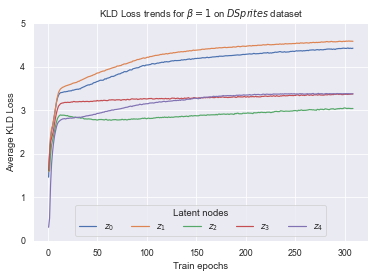

In [43]:
save_path = "kld_trends_wkld1.pdf"
plot_kld_loss_trends(metrics_df_wkld1, save_path)

In [32]:
tf_metrics_in_path = r"D:\Saarbrucken\EDA_Research\vae-disentanglement\notebooks\dsprites_latentnn_w_kld5\dsprites_latentnn_w_kld5"
csv_metrics_out_path = "./dsprites_metrics_wkld5.csv"

metrics_df_wkld5 = tensorboard_logs_to_pandas_dataframe(tf_metrics_in_path)
metrics_df_wkld5.to_csv(csv_metrics_out_path)

<AxesSubplot:title={'center':'KLD Loss trends for $\\beta = 5$ on $\\mathit{DSprites}$ dataset'}, xlabel='Train epochs', ylabel='Average KLD Loss'>

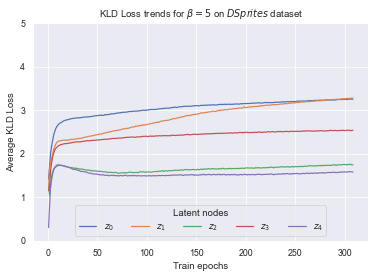

In [40]:
save_path = "kld_trends_wkld5.pdf"
plot_kld_loss_trends(metrics_df_wkld5, save_path)

In [65]:
metrics_df_wkld5["metric"].unique()

array(['Loss/Total Loss (Train)', 'Loss/Reconstruction Loss (Train)',
       'Loss/Total KLD Loss (Train)', 'Node_1/Mu_q_comp_0',
       'Node_2/Mu_q_comp_0', 'Node_3/Mu_q_comp_0', 'Node_4/Mu_q_comp_0',
       'Node_5/Mu_q_comp_0', 'Node_1/Mu_p_comp_0', 'Node_2/Mu_p_comp_0',
       'Node_3/Mu_p_comp_0', 'Node_4/Mu_p_comp_0', 'Node_5/Mu_p_comp_0',
       'Node_1/Std_q_comp_0', 'Node_2/Std_q_comp_0',
       'Node_3/Std_q_comp_0', 'Node_4/Std_q_comp_0',
       'Node_5/Std_q_comp_0', 'Node_1/Std_p_comp_0',
       'Node_2/Std_p_comp_0', 'Node_3/Std_p_comp_0',
       'Node_4/Std_p_comp_0', 'Node_5/Std_p_comp_0',
       'LossTermWeights/w_recon', 'LossTermWeights/w_kld',
       'LossTermWeights/w_sup_reg', 'LossTermWeights/w_cov_loss',
       'KLD_Per_Node/KLD_z_0', 'KLD_Per_Node/KLD_z_1',
       'KLD_Per_Node/KLD_z_2', 'KLD_Per_Node/KLD_z_3',
       'KLD_Per_Node/KLD_z_4'], dtype=object)

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/47728396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_loss_trend_wkld5_df['kld_value'] = [5] * len(total_loss_trend_wkld5_df)
C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/47728396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_loss_trend_wkld1_df['kld_value'] = [1] * len(total_loss_trend_wkld1_df)


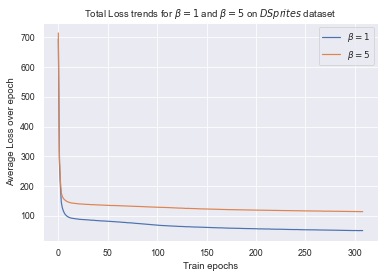

In [68]:
total_loss_trend_wkld5_df = metrics_df_wkld5[ metrics_df_wkld5["metric"] == "Loss/Total Loss (Train)" ]
total_loss_trend_wkld1_df = metrics_df_wkld1[ metrics_df_wkld1["metric"] == "Loss/Total Loss (Train)" ]

# added these cols so that we can use them in hue later
total_loss_trend_wkld5_df['kld_value'] = [5] * len(total_loss_trend_wkld5_df)
total_loss_trend_wkld1_df['kld_value'] = [1] * len(total_loss_trend_wkld1_df)

total_loss_df = pd.concat([total_loss_trend_wkld1_df, total_loss_trend_wkld5_df], ignore_index=True)

loss_plot = sns.lineplot(x="step", y="value", hue="kld_value", palette=["C0", "C1"], data=total_loss_df)

plt.xlabel('Train epochs')
plt.ylabel('Average Loss over epoch')
plt.title(r'Total Loss trends for $\beta = 1$ and $\beta = 5$ on $\mathit{DSprites}$ dataset')
#plt.legend(loc="lower center", ncol=5)
    
# update legend title
loss_plot.legend_.set_title(None)
# Update the legends
node_labels = [r'$\beta = 1$', r'$\beta = 5$']
for old_legend, new_legend in zip(loss_plot.legend_.texts, node_labels):
    old_legend.set_text(new_legend)

loss_plot.get_figure().savefig("total_loss_trends_plot.pdf")

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/3681010861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kld_loss_trend_wkld5_df['kld_value'] = [5] * len(total_kld_loss_trend_wkld5_df)
C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/3681010861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kld_loss_trend_wkld1_df['kld_value'] = [1] * len(total_kld_loss_trend_wkld1_df)


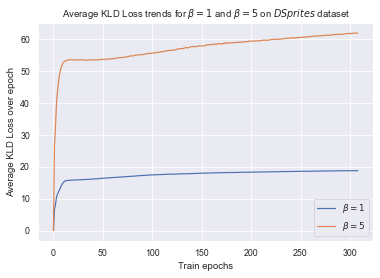

In [69]:
total_kld_loss_trend_wkld5_df = metrics_df_wkld5[ metrics_df_wkld5["metric"] == "Loss/Total KLD Loss (Train)" ]
total_kld_loss_trend_wkld1_df = metrics_df_wkld1[ metrics_df_wkld1["metric"] == "Loss/Total KLD Loss (Train)" ]

# added these cols so that we can use them in hue later
total_kld_loss_trend_wkld5_df['kld_value'] = [5] * len(total_kld_loss_trend_wkld5_df)
total_kld_loss_trend_wkld1_df['kld_value'] = [1] * len(total_kld_loss_trend_wkld1_df)

total_kld_loss_df = pd.concat([total_kld_loss_trend_wkld1_df, total_kld_loss_trend_wkld5_df], ignore_index=True)

loss_plot = sns.lineplot(x="step", y="value", hue="kld_value", palette=["C0", "C1"], data=total_kld_loss_df)

plt.xlabel('Train epochs')
plt.ylabel('Average KLD Loss over epoch')
plt.title(r'Average KLD Loss trends for $\beta = 1$ and $\beta = 5$ on $\mathit{DSprites}$ dataset')
#plt.legend(loc="lower center", ncol=5)
    
# update legend title
loss_plot.legend_.set_title(None)
# Update the legends
node_labels = [r'$\beta = 1$', r'$\beta = 5$']
for old_legend, new_legend in zip(loss_plot.legend_.texts, node_labels):
    old_legend.set_text(new_legend)
    
loss_plot.get_figure().savefig("total_kld_loss_trends_plot.pdf")

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/1163420091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_recon_loss_trend_wkld5_df['kld_value'] = [5] * len(total_recon_loss_trend_wkld5_df)
C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_9796/1163420091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_recon_loss_trend_wkld1_df['kld_value'] = [1] * len(total_recon_loss_trend_wkld1_df)


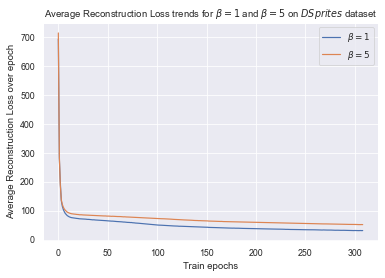

In [70]:
total_recon_loss_trend_wkld5_df = metrics_df_wkld5[ metrics_df_wkld5["metric"] == "Loss/Reconstruction Loss (Train)" ]
total_recon_loss_trend_wkld1_df = metrics_df_wkld1[ metrics_df_wkld1["metric"] == "Loss/Reconstruction Loss (Train)" ]

# added these cols so that we can use them in hue later
total_recon_loss_trend_wkld5_df['kld_value'] = [5] * len(total_recon_loss_trend_wkld5_df)
total_recon_loss_trend_wkld1_df['kld_value'] = [1] * len(total_recon_loss_trend_wkld1_df)

total_recon_loss_df = pd.concat([total_recon_loss_trend_wkld1_df, total_recon_loss_trend_wkld5_df], ignore_index=True)

loss_plot = sns.lineplot(x="step", y="value", hue="kld_value", palette=["C0", "C1"], data=total_recon_loss_df)

plt.xlabel('Train epochs')
plt.ylabel('Average Reconstruction Loss over epoch')
plt.title(r'Average Reconstruction Loss trends for $\beta = 1$ and $\beta = 5$ on $\mathit{DSprites}$ dataset')
#plt.legend(loc="lower center", ncol=5)
    
# update legend title
loss_plot.legend_.set_title(None)
# Update the legends
node_labels = [r'$\beta = 1$', r'$\beta = 5$']
for old_legend, new_legend in zip(loss_plot.legend_.texts, node_labels):
    old_legend.set_text(new_legend)
    
loss_plot.get_figure().savefig("total_recon_loss_trends_plot.pdf")

In [12]:
# Fix a scale value and a shape value
# find all the Z's and corresponding X's

# pass the X's thru the network to get Z ~ q(Z|X)
# average Z and extract the value of dimension corresponding to scale. should be the least varied dimension 

In [14]:
3*32*6*40

23040

In [2]:
cd D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\disentanglement_lib_pl

D:\Saarbrucken\EDA_Research\vae-disentanglement\disentanglement_lib_pl


In [4]:
import os
import torch
from collections import namedtuple

import models
from gnncsvae_experiment import GNNCSVAEExperiment

# set up params for loading the model


PROJECT_ROOT = r"D:\Saarbrucken\EDA_Research\vae-disentanglement"
datapath = os.path.join(PROJECT_ROOT, "datasets")
os.environ['DISENTANGLEMENT_LIB_DATA'] = datapath

ModelParams = namedtuple('ModelParams', ["z_dim", "l_dim", "num_labels" , "in_channels", 
                                        "image_size", "batch_size", "w_recon", "w_kld", "w_sup_reg", "w_cov_loss", 
                                         "kl_warmup_epochs",
                                         "adjacency_matrix", "loss_terms", "use_loss_weights",
                                        "controlled_capacity_increase", "iterations_c", "max_capacity", "dset_name", 
                                         "num_indept_nodes", "prior_type"
                                        ])

ExpParams = dict(
        in_channels=1,
        image_size=64,
        LR=1e-4,
        weight_decay=0.0,       
        dataset=None,
        datapath=datapath,
        droplast=True,        
        batch_size=64,
        num_workers=0,
        pin_memory=False,
        seed=123,
        evaluation_metrics=None,
        visdom_on=False,
        save_dir=None,
        max_epochs=1,
        l_zero_reg=False
)

# load the learned model here

algo_name = "LatentNN_CSVAE"
checkpoint_path = os.path.join(PROJECT_ROOT, "models", "dsprites_latentnn_w_kld5_308eps.ckpt")
z_dim = 1
channels = 1
l_dim = 6
num_nodes = 5
num_indept_nodes = 0
dataset_name = "dsprites_full"
current_device = torch.device("cuda:0")
prior_type = "independent_fixed_prior"

# prep params
model_params = ModelParams(
        [z_dim], l_dim, 0, channels, 64, 64,
        1.0, 5.0, 0.0, 0, 0,
        os.path.join(PROJECT_ROOT, "adjacency_matrices", f"{dataset_name}.pkl"),
        [], False,
        False, 0, 0, dataset_name, num_indept_nodes, prior_type
)

ExpParams['channels'] = channels

# load model
print("Loading model")
vae_model_class = getattr(models, algo_name)
vae_model = vae_model_class(model_params)

vae_experiment = GNNCSVAEExperiment.load_from_checkpoint(
            checkpoint_path,
            vae_model=vae_model, 
            params=ExpParams,
            dataset_params=None).to(current_device)

Loading model
Posterior mat:  tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
Num neighbours: tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
Prior type:  independent_fixed_prior
LatentNN_CSVAE Model Initialized


In [5]:
def get_data_for_mean_latent_response_plot_position(vae_model, num_latents, npz_path, N, current_device):
    
    from torchvision import transforms
    
    POS_X_INDEX, POS_Y_INDEX = 4, 5
    
    dsprites = nbutils.load_dsprites(npz_path)

    pos_x_values = range(dsprites['latents_sizes'][POS_X_INDEX])
    pos_y_values = range(dsprites['latents_sizes'][POS_Y_INDEX])
    
    
    heatmap_matrix = np.zeros(shape=(len(pos_x_values), len(pos_y_values), num_latents))
    
    for x in pos_x_values:
        for y in pos_y_values:
            
            G = nbutils.sample_latent(N, dsprites['latents_sizes'])
            #print(x,y)
            # fix the value of x and y
            G[:, POS_X_INDEX] = x
            G[:, POS_Y_INDEX] = y
            
            indices_sampled = nbutils.latent_to_index(G, dsprites['latents_bases'])
            images_sampled = dsprites['images'][indices_sampled]
            
            z_samples = np.zeros(shape=(len(images_sampled), num_latents))
            for i, img in enumerate(images_sampled):
                
                img = transforms.ToTensor()(img.astype(np.float32)).to(current_device)
                mu, logvar, z = vae_model.encode(img.unsqueeze(0))
                z_samples[i,:] = mu.detach().cpu().numpy().squeeze()
                
            heatmap_matrix[x,y,:] = np.mean(z_samples, axis=0)
    
    del dsprites
    return heatmap_matrix
                

In [6]:
def get_data_for_mean_latent_response_plot_scale(vae_model, num_latents, npz_path, N, current_device):
    
    from torchvision import transforms
    
    SCALE_INDEX = 2
    SHAPE_INDEX = 1
    
    dsprites = nbutils.load_dsprites(npz_path)

    scale_values = range(dsprites['latents_sizes'][SCALE_INDEX])
    shape_values = range(dsprites['latents_sizes'][SHAPE_INDEX])
    
    empty_init = {f"z{i}" : [] for i in range(num_latents)}
    empty_init.update({
        "shape": [],
        "scale": []
    })
    
    pandas_df = pd.DataFrame(empty_init)
    
    for scale in scale_values:
        for shape in shape_values:
            
            G = nbutils.sample_latent(N, dsprites['latents_sizes'])
            #print(x,y)
            # fix the value of x and y
            G[:, SCALE_INDEX] = scale
            G[:, SHAPE_INDEX] = shape
            
            indices_sampled = nbutils.latent_to_index(G, dsprites['latents_bases'])
            images_sampled = dsprites['images'][indices_sampled]
            
            z_samples = np.zeros(shape=(len(images_sampled), num_latents))
            for i, img in enumerate(images_sampled):
                
                img = transforms.ToTensor()(img.astype(np.float32)).to(current_device)
                mu, logvar, z = vae_model.encode(img.unsqueeze(0))
                z_samples[i,:] = mu.detach().cpu().numpy().squeeze()
            
                row_entries = {f"z{k}" : [z_samples[i,k]] for k in range(num_latents)}
                row_entries.update({"scale": [scale], "shape": [shape]})
                new_row = pd.DataFrame(row_entries)
                pandas_df = pd.concat([pandas_df, new_row], ignore_index=True)
                
    del dsprites
    return pandas_df

In [7]:
def get_data_for_mean_latent_response_plot_orientation(vae_model, num_latents, npz_path, N, current_device):
    
    from torchvision import transforms
    
    ORIENTATION_INDEX = 3
    SHAPE_INDEX = 1
    
    dsprites = nbutils.load_dsprites(npz_path)

    ori_values = range(dsprites['latents_sizes'][ORIENTATION_INDEX])
    shape_values = range(dsprites['latents_sizes'][SHAPE_INDEX])
    
    empty_init = {f"z{i}" : [] for i in range(num_latents)}
    empty_init.update({
        "shape": [],
        "orientation": []
    })
    
    pandas_df = pd.DataFrame(empty_init)
    
    for ori in ori_values:
        for shape in shape_values:
            
            G = nbutils.sample_latent(N, dsprites['latents_sizes'])
            #print(x,y)
            # fix the value of x and y
            G[:, ORIENTATION_INDEX] = ori
            G[:, SHAPE_INDEX] = shape
            
            indices_sampled = nbutils.latent_to_index(G, dsprites['latents_bases'])
            images_sampled = dsprites['images'][indices_sampled]
            
            z_samples = np.zeros(shape=(len(images_sampled), num_latents))
            for i, img in enumerate(images_sampled):
                
                img = transforms.ToTensor()(img.astype(np.float32)).to(current_device)
                mu, logvar, z = vae_model.encode(img.unsqueeze(0))
                z_samples[i,:] = mu.detach().cpu().numpy().squeeze()
            
                row_entries = {f"z{k}" : [z_samples[i,k]] for k in range(num_latents)}
                row_entries.update({"orientation": [ori], "shape": [shape]})
                new_row = pd.DataFrame(row_entries)
                pandas_df = pd.concat([pandas_df, new_row], ignore_index=True)
                
    del dsprites
    return pandas_df

In [8]:
npz_path = "../datasets/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
N=300
num_latents=5
heatmap_matrix = get_data_for_mean_latent_response_plot_position(vae_model, num_latents, npz_path, N, current_device)

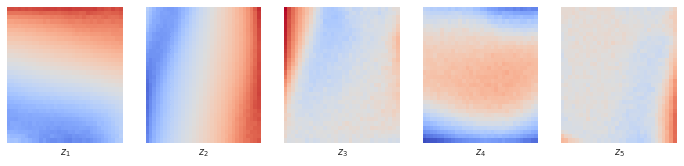

In [9]:
mlr_pos, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 2.5))

vmin, vmax = np.min(heatmap_matrix), np.max(heatmap_matrix)
for i, ax in enumerate(axes.flat):
    sns.heatmap(heatmap_matrix[:,:,i], cmap="coolwarm", ax=ax, vmin=vmin, vmax=vmax,cbar=False)
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_xticks([])
    ax.set_yticks([])

mlr_pos.savefig("../notebooks/kld5_dsprites/mean_latent_response_pos.pdf")

In [51]:
np.min(heatmap_matrix), np.max(heatmap_matrix)

(-2.3801453828811647, 2.2944541772206626)

In [10]:
# TODO: same plot as above but for Scale an Orientation?

npz_path = "../datasets/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
N=1000
num_latents=5
scales_df = get_data_for_mean_latent_response_plot_scale(vae_model, num_latents, npz_path, N, current_device)

In [66]:
scales_df

,z0,z1,z2,z3,z4,shape,scale
0,0.207652,-0.335135,-0.352710,0.427841,0.617816,0.0,0.0
1,1.533810,-1.615369,-0.034168,0.353190,1.029837,0.0,0.0
2,-1.125590,1.955956,1.580559,-0.511819,0.879798,0.0,0.0
3,-0.326262,0.017902,-0.535649,0.952056,0.680211,0.0,0.0
4,0.511391,1.912498,-0.004731,0.348742,0.627708,0.0,0.0
...,...,...,...,...,...,...,...
535,0.565842,-0.635883,-1.070795,1.188890,-0.476407,2.0,5.0
536,-1.100115,-0.247639,-0.366094,-0.813247,-0.551519,2.0,5.0
537,1.921630,1.092197,-1.901855,-1.375838,-0.339708,2.0,5.0
538,0.217565,-0.288969,0.693158,1.473146,-0.585107,2.0,5.0


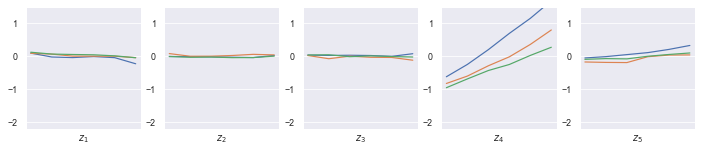

In [11]:
mlr_scale, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 2.25))

for i, ax in enumerate(axes.flat):
    sns.lineplot(
        x="scale", 
        y=f"z{i}", 
        hue="shape",
        data=scales_df,
        ax=ax,
        ci=None,
        legend=False,
        palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_ylim([-2.2, 1.5])

mlr_scale.savefig("../notebooks/kld5_dsprites/mean_latent_response_scale.pdf")

In [12]:

npz_path = "../datasets/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
N=1000
num_latents=5
ori_df = get_data_for_mean_latent_response_plot_orientation(vae_model, num_latents, npz_path, N, current_device)

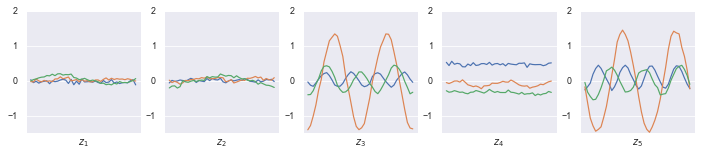

In [13]:
mlr_orientation, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 2.25))

for i, ax in enumerate(axes.flat):
    sns.lineplot(
        x="orientation", 
        y=f"z{i}", 
        hue="shape",
        data=ori_df,
        ax=ax,
        ci=None,
        legend=False,
        palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_ylim([-1.5, 2])
    #ax.set_ylim([-1, 0])

mlr_orientation.savefig("../notebooks/kld5_dsprites/mean_latent_response_rotation.pdf")

In [2]:
cd D:\\Saarbrucken\\EDA_Research\\vae-disentanglement\\disentanglement_lib_pl

D:\Saarbrucken\EDA_Research\vae-disentanglement\disentanglement_lib_pl


In [3]:
from common import utils
from common import notebook_utils as nbutils

# MLR for Pendulum 

In [4]:
# load pendulum model

import os
import torch
from collections import namedtuple

import models
from gnncsvae_experiment import GNNCSVAEExperiment

# set up params for loading the model


PROJECT_ROOT = r"D:\Saarbrucken\EDA_Research\vae-disentanglement"
datapath = os.path.join(PROJECT_ROOT, "datasets")
os.environ['DISENTANGLEMENT_LIB_DATA'] = datapath

ModelParams = namedtuple('ModelParams', ["z_dim", "l_dim", "num_labels" , "in_channels", 
                                        "image_size", "batch_size", "w_recon", "w_kld", "w_sup_reg", "w_cov_loss", 
                                         "kl_warmup_epochs",
                                         "adjacency_matrix", "loss_terms", "use_loss_weights",
                                        "controlled_capacity_increase", "iterations_c", "max_capacity", "dset_name", 
                                         "num_indept_nodes", "prior_type"
                                        ])

ExpParams = dict(
        in_channels=3,
        image_size=64,
        LR=1e-4,
        weight_decay=0.0,       
        dataset=None,
        datapath=datapath,
        droplast=True,        
        batch_size=64,
        num_workers=0,
        pin_memory=False,
        seed=123,
        evaluation_metrics=None,
        visdom_on=False,
        save_dir=None,
        max_epochs=1,
        l_zero_reg=False
)

# load the learned model here

algo_name = "LatentNN_CSVAE"
checkpoint_path = os.path.join(PROJECT_ROOT, "models", "latentnn_183eps_kld15_pendulum.ckpt")
z_dim = 1
channels = 3
l_dim = 4
num_nodes = 4
num_indept_nodes = 0
dataset_name = "pendulum"
current_device = torch.device("cuda:0")
prior_type = "independent_fixed_prior"

# prep params
model_params = ModelParams(
        [z_dim], l_dim, 0, channels, 64, 64,
        1.0, 5.0, 1.0, 0, 0,
        os.path.join(PROJECT_ROOT, "adjacency_matrices", f"{dataset_name}.pkl"),
        ['aux_classification'], False,
        False, 0, 0, dataset_name, num_indept_nodes, prior_type
)

ExpParams['channels'] = channels

# load model
print("Loading model")
vae_model_class = getattr(models, algo_name)
vae_model = vae_model_class(model_params)

vae_experiment = GNNCSVAEExperiment.load_from_checkpoint(
            checkpoint_path,
            vae_model=vae_model, 
            params=ExpParams,
            dataset_params=None).to(current_device)

Loading model
Posterior mat:  tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 1.]])
Num neighbours: tensor([[1.],
        [1.],
        [3.],
        [3.]])
Prior type:  gt_based_fixed_prior
LatentNN_CSVAE Model Initialized


In [24]:
def get_pendulum_labels_df(dataset, data_dir):
    """
    Creating indices because floating point comparison in 
    dataframes don't seem to work
    """
    
    # Pendulum angle has 84 unique values
    # Light position has has 87 unique values
    THETA_LEVELS, PHI_LEVELS = 84, 87   

    theta_idx = [[i]*PHI_LEVELS for i in range(THETA_LEVELS)]
    theta_idx_list =[]

    for i, fixed_cls in enumerate(theta_idx): 
        theta_idx_list.extend(fixed_cls)

    phi_idx_list = [i for i in range(PHI_LEVELS)]*THETA_LEVELS 


    pendulum_df = pd.read_csv(os.path.join(data_dir, dataset, dataset + "_labels.csv"))
    pendulum_df['theta_index'] = theta_idx_list + (theta_idx_list if dataset == "pendulum_switch" else [])
    pendulum_df['phi_index'] = phi_idx_list + (phi_idx_list if dataset == "pendulum_switch" else [])
    
    return pendulum_df

dset_dir, dset_name = "../datasets/", "pendulum"
pendulum_df = get_pendulum_labels_df(dset_name, dset_dir)

In [29]:
def mean_latent_response_for_pendulum_concept(dataset, data_dir, concept, 
                                              num_latents, pendulum_df, vae_model, 
                                              current_device, concept_type="continuous"):
    
    pendulum_dataset = nbutils.__handle_pendulum(data_dir, dataset)

    empty_init = {f"z{i}" : [] for i in range(num_latents)}
    empty_init.update({
        concept: []
    })

    pandas_df = pd.DataFrame(empty_init)
    
    concept_levels = len(pendulum_df[concept].unique())
    
    for fixed_value in range(concept_levels):
        
        if concept_type == "continuous":
            fixed_value_df = pendulum_df[ pendulum_df[f'{concept}_index'] == fixed_value ]
        else:
            # discrete concept
            fixed_value_df = pendulum_df[ pendulum_df[concept] == fixed_value ]
        
        chosen_indices = fixed_value_df.index.tolist()
        #print(chosen_indices)
        for ci in chosen_indices:

            img, _ = pendulum_dataset[ci]
            img = img.to(current_device)
            #print(img.shape)
            #z_samples = np.zeros(shape=(len(chosen_indices), num_latents))

            mu, logvar, z = vae_model.encode(img.unsqueeze(0))
            response_mus = mu.detach().cpu().numpy().squeeze()
            #print(response_mus.shape)

            # save activations of each latent unit for each image in a dataframe row
            row_entries = {f"z{k}" : [response_mus[k]] for k in range(num_latents)}
            row_entries.update({concept : [fixed_value]})

            new_row = pd.DataFrame(row_entries)
            pandas_df = pd.concat([pandas_df, new_row], ignore_index=True)

    return pandas_df

In [9]:
dset_dir, dset_name = "../datasets/", "pendulum"
num_latents = 4
concept = "theta"

mlr_theta_df = mean_latent_response_for_pendulum_concept(dset_name, dset_dir, concept, 
                                              num_latents, pendulum_df, vae_model, 
                                              current_device)

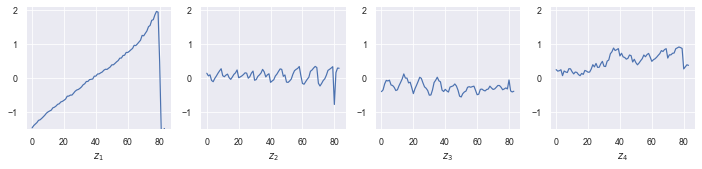

In [10]:
mlr_theta, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 2.25))

for i, ax in enumerate(axes.flat):
    sns.lineplot(
        x="theta", 
        y=f"z{i}", 
        #hue="shape",
        data=mlr_theta_df,
        ax=ax,
        ci=None,
        legend=False
        #palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_ylim([-1.5, 2.1])

In [7]:
dset_dir, dset_name = "../datasets/", "pendulum"
num_latents = 4
concept = "phi"
mlr_phi_df = mean_latent_response_for_pendulum_concept(dset_name, dset_dir, concept, 
                                              num_latents, pendulum_df, vae_model, 
                                              current_device)

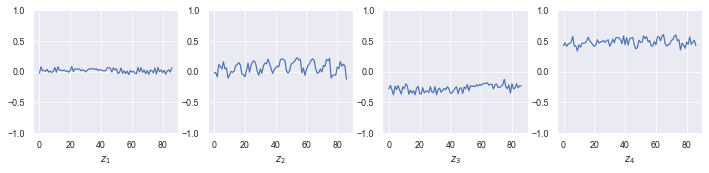

In [14]:
mlr_phi, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 2.25))

for i, ax in enumerate(axes.flat):
    sns.lineplot(
        x="phi", 
        y=f"z{i}", 
        #hue="shape",
        data=mlr_phi_df,
        ax=ax,
        ci=None,
        legend=False
        #palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_ylim([-1, 1])

# MLR for Pendulum Switch

In [25]:
dset_dir, dset_name = "../datasets/", "pendulum_switch"
pendulum_switch_df = get_pendulum_labels_df(dset_name, dset_dir)

In [27]:
# load pendulum model

import os
import torch
from collections import namedtuple

import models
from gnncsvae_experiment import GNNCSVAEExperiment

# set up params for loading the model


PROJECT_ROOT = r"D:\Saarbrucken\EDA_Research\vae-disentanglement"
datapath = os.path.join(PROJECT_ROOT, "datasets")
os.environ['DISENTANGLEMENT_LIB_DATA'] = datapath

ModelParams = namedtuple('ModelParams', ["z_dim", "l_dim", "num_labels" , "in_channels", 
                                        "image_size", "batch_size", "w_recon", "w_kld", "w_sup_reg", "w_cov_loss", 
                                         "kl_warmup_epochs",
                                         "adjacency_matrix", "loss_terms", "use_loss_weights",
                                        "controlled_capacity_increase", "iterations_c", "max_capacity", "dset_name", 
                                         "num_indept_nodes", "prior_type"
                                        ])

ExpParams = dict(
        in_channels=3,
        image_size=64,
        LR=1e-4,
        weight_decay=0.0,       
        dataset=None,
        datapath=datapath,
        droplast=True,        
        batch_size=64,
        num_workers=0,
        pin_memory=False,
        seed=123,
        evaluation_metrics=None,
        visdom_on=False,
        save_dir=None,
        max_epochs=1,
        l_zero_reg=False
)

# load the learned model here

algo_name = "LatentNN_CSVAE"
checkpoint_path = os.path.join(PROJECT_ROOT, "models", "latentnn_167eps_kld5_pendulum_sw.ckpt")
z_dim = 1
channels = 3
l_dim = 6
num_nodes = 6
num_indept_nodes = 0
dataset_name = "pendulum_switch"
current_device = torch.device("cuda:0")
prior_type = "independent_fixed_prior"

# prep params
model_params = ModelParams(
        [z_dim], l_dim, 0, channels, 64, 64,
        1.0, 5.0, 1.0, 0, 0,
        os.path.join(PROJECT_ROOT, "adjacency_matrices", f"{dataset_name}.pkl"),
        ['aux_classification'], False,
        False, 0, 0, dataset_name, num_indept_nodes, prior_type
)

ExpParams['channels'] = channels

# load model
print("Loading model")
vae_model_class = getattr(models, algo_name)
vae_model = vae_model_class(model_params)

vae_experiment = GNNCSVAEExperiment.load_from_checkpoint(
            checkpoint_path,
            vae_model=vae_model, 
            params=ExpParams,
            dataset_params=None).to(current_device)

Loading model
Posterior mat:  tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0., 1.]])
Num neighbours: tensor([[1.],
        [2.],
        [1.],
        [1.],
        [4.],
        [4.]])
Prior type:  gt_based_fixed_prior
LatentNN_CSVAE Model Initialized


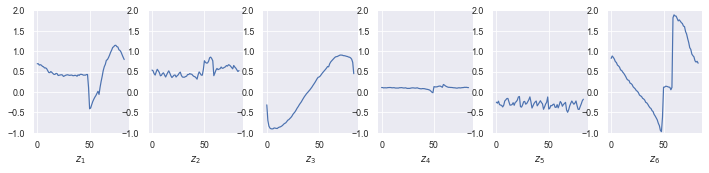

In [37]:
dset_dir, dset_name = "../datasets/", "pendulum_switch"
num_latents = 6
concept = "theta"

mlr_sw_theta_df = mean_latent_response_for_pendulum_concept(dset_name, dset_dir, concept, 
                                              num_latents, pendulum_switch_df, vae_model, 
                                              current_device)

mlr_sw_theta, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 2.25))

for i, ax in enumerate(axes.flat):
    sns.lineplot(
        x="theta", 
        y=f"z{i}", 
        #hue="shape",
        data=mlr_sw_theta_df,
        ax=ax,
        ci=None,
        legend=False
        #palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_ylim([-1, 2])

In [ ]:
dset_dir, dset_name = "../datasets/", "pendulum_switch"
num_latents = 6
concept = "switch_on"

mlr_sw_switch_on_df = mean_latent_response_for_pendulum_concept(dset_name, dset_dir, concept, 
                                              num_latents, pendulum_switch_df, vae_model, 
                                              current_device, concept_type="discrete")



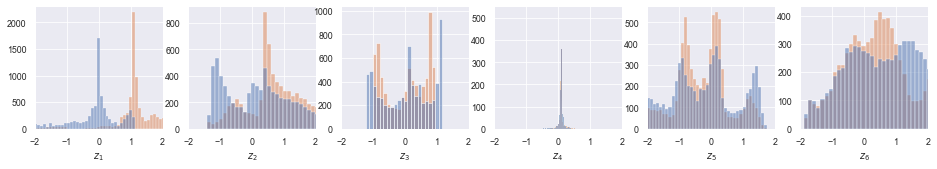

In [45]:
mlr_sw_switch_on, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 2.25))

for i, ax in enumerate(axes.flat):
    sns.histplot(
        #x="", 
        x=f"z{i}", 
        hue="switch_on",
        data=mlr_sw_switch_on_df,
        ax=ax,
        legend=False
        #palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_xlim([-2, 2])

In [ ]:
dset_dir, dset_name = "../datasets/", "pendulum_switch"
num_latents = 6
concept = "light_color"

mlr_sw_light_color_df = mean_latent_response_for_pendulum_concept(dset_name, dset_dir, concept, 
                                              num_latents, pendulum_switch_df, vae_model, 
                                              current_device, concept_type="discrete")

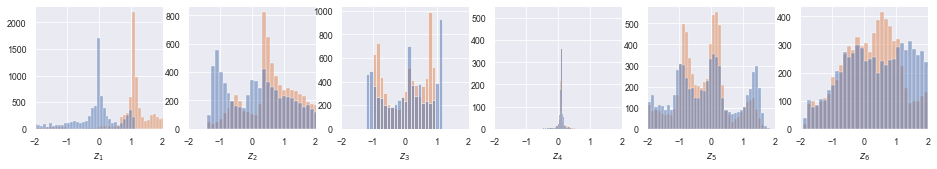

In [46]:
mlr_sw_light_color, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 2.25))

for i, ax in enumerate(axes.flat):
    sns.histplot(
        #x="", 
        x=f"z{i}", 
        hue="light_color",
        data=mlr_sw_light_color_df,
        ax=ax,
        legend=False
        #palette=sns.color_palette()[:3]
    )
    ax.set_xlabel(f'$z_{i+1}$')
    ax.set_ylabel(None)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_xlim([-2, 2])